In [1]:
import os
import gc
import pickle
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

# self-defined functions
# from helper import *
# from tabu_helper import *
from tabu import tabu_search

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
currentPath = os.getcwd()

In [3]:
with open(currentPath + '/clean_data/sectorMap.pkl', 'rb') as f:
    sectorMap = pickle.load(f)
    
with open(currentPath + '/clean_data/inv_sectorMap.pkl', 'rb') as f:
    inv_sectorMap = pickle.load(f)

with open(currentPath + '/clean_data/ratingMap.pkl', 'rb') as f:
    ratingMap = pickle.load(f)
    
train = pd.read_csv(currentPath + '/clean_data/train.csv', index_col=0)
test = pd.read_csv(currentPath + '/clean_data/test.csv', index_col=0)
corr = pd.read_csv(currentPath + '/clean_data/corr.csv', index_col=0)
varDF = pd.read_csv(currentPath + '/clean_data/var.csv', index_col=0)

train.index = pd.DatetimeIndex(train.index)
test.index = pd.DatetimeIndex(test.index)

In [4]:
alpha = 0.05
check_params = {
    "sectorMap": sectorMap,
    "inv_sectorMap": inv_sectorMap,
    "corr_df": corr,
    "risk_series": varDF[str(alpha)],
    "snum_ub": 30,
    "snum_lb": 10,
    "sector_snum_ub": 6,
    "corr_ub": 0.5,
    "risk_all_ub": 0,
    "risk_ind_ub": 0,
    "risk_all_lb": -0.03,
    "risk_ind_lb": -0.05,
    "details": False
}

### Try One time

In [9]:
training_params = {
    'return_df': train, 
    'test_return_df': test,
    'params': check_params, 
    'tabu_list_size': 20, 
    'iterations_times': 1000, 
    'early_stop': 50, 
    'neighbor_size': 50, 
    'asp_improve_level': 1, 
    'seed': None,
}

In [10]:
tryOne = tabu_search(**training_params)

 18%|█▊        | 178/1000 [03:33<29:05,  2.12s/it]


1.2235480653277546
-0.1557411813817574


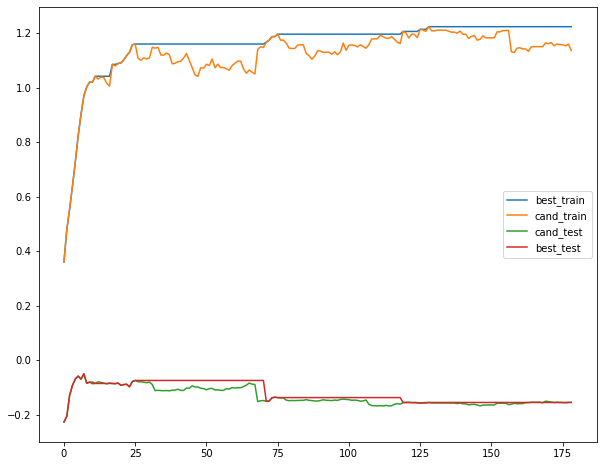

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(list(range(tryOne['iterations'])), tryOne['best_perfList'], label='best_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_perfList'], label='cand_train')
plt.plot(list(range(tryOne['iterations'])), tryOne['cand_test_perfList'], label='cand_test')
plt.plot(list(range(tryOne['iterations'])), tryOne['best_test_perfList'], label='best_test')
plt.legend()
print(tryOne['best_perfList'][-1])
print(tryOne['best_test_perfList'][-1])

### Try Multiple Times and Different Parameter Combinations

In [5]:
testResult = {}

In [7]:
GridParams = {
    'tabu_list_size': [10, 30, 50], 
    'iterations_times': [100, 200, 300],
    'early_stop': [20, 50, float("inf")], 
    'neighbor_size': [50, 100, 300], 
    'asp_improve_level': [-1, 1, 5], 
}
params = {
    'return_df': train, 
    'test_return_df': test,
    'params': check_params, 
}

In [8]:
for vs in tqdm_notebook(list(itertools.product(*tuple(GridParams.values())))):
    print(vs)
    g_param = {**params, **{k: v for k, v in zip(GridParams.keys(), vs)}}
    testResult[vs] = tabu_search(**g_param)
    gc.collect()

  0%|          | 0/100 [00:00<?, ?it/s]

(10, 100, 20, 50, -1)


 16%|█▌        | 16/100 [00:07<00:40,  2.08it/s]


KeyboardInterrupt: 

In [13]:
with open(os.getcwd() + '/result/grid_search.pkl', 'wb') as f:
    pickle.dump(testResult, f, pickle.HIGHEST_PROTOCOL)

In [21]:
sorted([(k, v['best_perf'], v['best_test_perfList'][-1]) for k, v in testResult.items()], key=lambda x: x[1], reverse=True)

[((10, 100, 20, 300, -1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, 20, 300, 1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, 20, 300, 5), 52.651032516820536, -3.8565269899774055),
 ((10, 100, 50, 300, -1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, 50, 300, 1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, 50, 300, 5), 52.651032516820536, -3.8565269899774055),
 ((10, 100, inf, 300, -1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, inf, 300, 1), 52.651032516820536, -3.8565269899774055),
 ((10, 100, inf, 300, 5), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 20, 300, -1), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 20, 300, 1), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 20, 300, 5), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 50, 300, -1), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 50, 300, 1), 52.651032516820536, -3.8565269899774055),
 ((10, 200, 50, 300, 5), 52.651032516820536, -3.856526